In [87]:
import nsepy as nse
import pandas as pd
import numpy as np
from datetime import date

In [88]:
stock = nse.get_history(symbol='ICICIBANK', index=False,start=date(2021,1,1),end=date(2022,9,22))

In [89]:
stock.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-01-01,ICICIBANK,EQ,535.05,535.55,537.00,526.10,527.80,527.50,529.68,13592625,7.199709e+14,156898,4502751,0.3313
2021-01-04,ICICIBANK,EQ,527.50,532.30,535.00,524.30,531.70,531.70,530.07,16549750,8.772513e+14,179521,6014993,0.3634
2021-01-05,ICICIBANK,EQ,531.70,526.65,539.95,523.00,536.65,537.25,530.42,23311516,1.236498e+15,198989,8641365,0.3707
2021-01-06,ICICIBANK,EQ,537.25,538.75,550.60,535.85,544.90,546.70,544.25,28178838,1.533631e+15,256515,8046348,0.2855
2021-01-07,ICICIBANK,EQ,546.70,552.15,554.40,539.75,542.25,541.10,546.20,21138034,1.154558e+15,204824,9858553,0.4664


In [90]:
stock.drop(['Series','Prev Close','High','Low','Last','VWAP','Volume','Turnover','Trades','Deliverable Volume','%Deliverble'],inplace=True, axis=1)

In [91]:
stock.tail()

,Symbol,Open,Close
Date,,,
2022-09-16,ICICIBANK,914.90,909.10
2022-09-19,ICICIBANK,904.95,899.20
2022-09-20,ICICIBANK,909.20,916.75
2022-09-21,ICICIBANK,912.00,915.25
2022-09-22,ICICIBANK,906.00,903.40


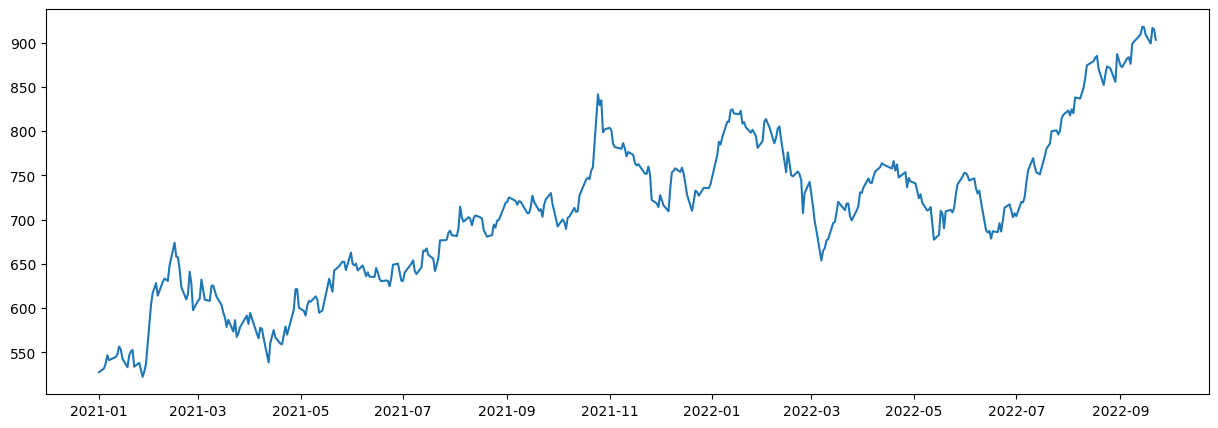

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.plot(stock["Close"],label="Close")

In [94]:
# Calculate the Moving average of 10 and 20 days

stock['MA_10'] = stock[['Close']].rolling(10).mean()

stock['MA_20'] = stock[['Close']].rolling(20).mean()

In [95]:
stock

,Symbol,Open,Close,MA_10,MA_20
Date,,,,,
2021-01-01,ICICIBANK,535.55,527.50,NaN,NaN
2021-01-04,ICICIBANK,532.30,531.70,NaN,NaN
2021-01-05,ICICIBANK,526.65,537.25,NaN,NaN
2021-01-06,ICICIBANK,538.75,546.70,NaN,NaN
2021-01-07,ICICIBANK,552.15,541.10,NaN,NaN
...,...,...,...,...,...
2022-09-16,ICICIBANK,914.90,909.10,900.435,884.8650
2022-09-19,ICICIBANK,904.95,899.20,902.110,886.3050
2022-09-20,ICICIBANK,909.20,916.75,905.420,889.5300


In [96]:
stock['MA_20']=round(stock['MA_20'],2)
stock['MA_20']=pd.DataFrame(stock['MA_20'])

stock['MA_10']=round(stock['MA_10'],2)
stock['MA_10']=pd.DataFrame(stock['MA_10'])

In [98]:
stock.dropna(inplace=True) 

In [99]:
stock

,Symbol,Open,Close,MA_10,MA_20
Date,,,,,
2021-01-29,ICICIBANK,533.35,537.00,538.58,540.73
2021-02-01,ICICIBANK,552.00,603.80,544.66,544.54
2021-02-02,ICICIBANK,613.00,617.35,553.08,548.83
2021-02-03,ICICIBANK,623.40,622.35,560.66,553.08
2021-02-04,ICICIBANK,618.80,628.30,568.40,557.16
...,...,...,...,...,...
2022-09-16,ICICIBANK,914.90,909.10,900.44,884.86
2022-09-19,ICICIBANK,904.95,899.20,902.11,886.30
2022-09-20,ICICIBANK,909.20,916.75,905.42,889.53


In [100]:
stock['signal']= np.where(stock['MA_10']>stock['MA_20'],1,0) 

In [101]:
stock.head(30)

,Symbol,Open,Close,MA_10,MA_20,signal
Date,,,,,,
2021-01-29,ICICIBANK,533.35,537.00,538.58,540.73,0
2021-02-01,ICICIBANK,552.00,603.80,544.66,544.54,1
2021-02-02,ICICIBANK,613.00,617.35,553.08,548.83,1
2021-02-03,ICICIBANK,623.40,622.35,560.66,553.08,1
2021-02-04,ICICIBANK,618.80,628.30,568.40,557.16,1
2021-02-05,ICICIBANK,628.30,614.15,574.54,560.81,1
2021-02-08,ICICIBANK,622.35,629.60,584.12,565.19,1
2021-02-09,ICICIBANK,631.35,633.35,593.65,569.62,1
2021-02-10,ICICIBANK,633.35,632.15,604.63,573.83,1


In [102]:
stock['B_S'] = stock['signal'].diff()

In [103]:
stock.head(30)

,Symbol,Open,Close,MA_10,MA_20,signal,B_S
Date,,,,,,,
2021-01-29,ICICIBANK,533.35,537.00,538.58,540.73,0,NaN
2021-02-01,ICICIBANK,552.00,603.80,544.66,544.54,1,1.0
2021-02-02,ICICIBANK,613.00,617.35,553.08,548.83,1,0.0
2021-02-03,ICICIBANK,623.40,622.35,560.66,553.08,1,0.0
2021-02-04,ICICIBANK,618.80,628.30,568.40,557.16,1,0.0
2021-02-05,ICICIBANK,628.30,614.15,574.54,560.81,1,0.0
2021-02-08,ICICIBANK,622.35,629.60,584.12,565.19,1,0.0
2021-02-09,ICICIBANK,631.35,633.35,593.65,569.62,1,0.0
2021-02-10,ICICIBANK,633.35,632.15,604.63,573.83,1,0.0


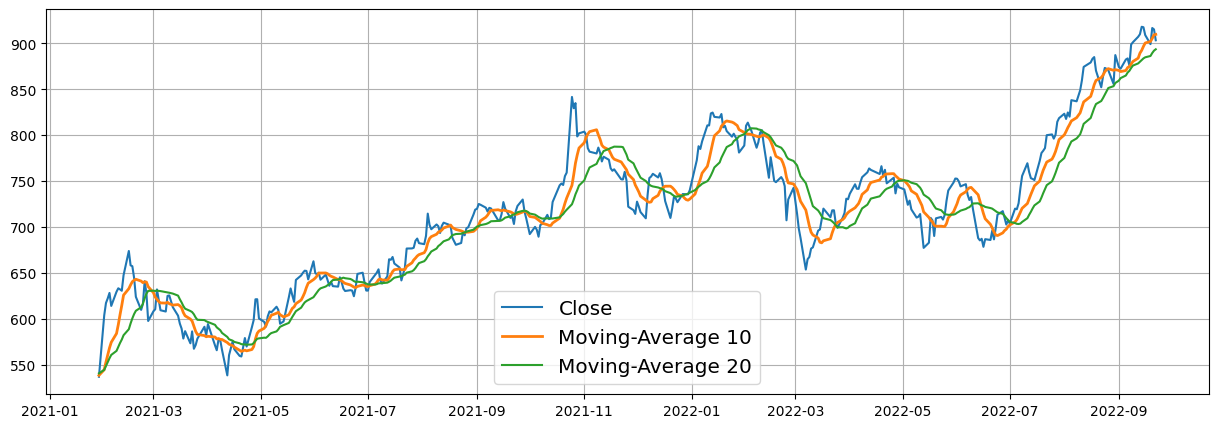

In [105]:
plt.figure(figsize=(15,5))

plt.plot(stock["Close"],label="Close")
plt.plot(stock['MA_10'],label="Moving-Average 10",linewidth = 2)
plt.plot(stock['MA_20'],label="Moving-Average 20")

plt.legend(loc='lower center',fontsize="x-large")
plt.grid()

In [108]:
buy_signal=stock[stock['B_S']==1]

In [114]:
buy_signal


,Symbol,Open,Close,MA_10,MA_20,signal,B_S
Date,,,,,,,
2021-02-01,ICICIBANK,552.00,603.80,544.66,544.54,1,1.0
2021-04-28,ICICIBANK,598.00,621.35,578.20,576.23,1,1.0
2021-07-05,ICICIBANK,642.75,647.85,637.88,637.43,1,1.0
2021-09-02,ICICIBANK,722.30,725.15,702.52,701.04,1,1.0
2021-10-19,ICICIBANK,755.00,747.45,714.42,712.47,1,1.0
2021-12-16,ICICIBANK,757.90,741.15,743.30,740.80,1,1.0
2022-01-05,ICICIBANK,773.00,788.05,746.73,743.89,1,1.0
2022-03-24,ICICIBANK,702.45,704.20,702.75,701.98,1,1.0
2022-05-30,ICICIBANK,748.75,748.50,716.66,713.59,1,1.0


In [122]:
v=sum(buy_signal['Close'])

In [111]:
sell_signal=stock[stock['B_S']==-1]

In [112]:
sell_signal

,Symbol,Open,Close,MA_10,MA_20,signal,B_S
Date,,,,,,,
2021-03-01,ICICIBANK,607.55,608.35,628.58,630.76,0,-1.0
2021-06-15,ICICIBANK,636.35,645.30,642.46,643.47,0,-1.0
2021-08-25,ICICIBANK,699.95,691.05,694.08,694.30,0,-1.0
2021-09-23,ICICIBANK,711.00,717.00,713.90,714.93,0,-1.0
2021-11-15,ICICIBANK,777.00,773.30,784.18,785.11,0,-1.0
2021-12-27,ICICIBANK,724.00,736.00,733.78,734.16,0,-1.0
2022-02-01,ICICIBANK,802.05,810.30,802.14,803.49,0,-1.0
2022-05-02,ICICIBANK,732.00,741.00,750.60,750.93,0,-1.0
2022-06-15,ICICIBANK,687.50,687.25,721.90,723.69,0,-1.0


In [118]:
s=sum(sell_signal['Close'])

In [126]:
profit =v-s
profit

638.0500000000002